In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("electric_vehicles_spec_2025.csv.csv")

# Preview dataset
df.head()

# Check dimensions and datatypes
df.shape
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
count,478,477,478.000000,478.000000,478,276.000000,471.000000,478.000000,478.000000,478.000000,...,452.000000,477,478.000000,478,478,478.000000,478.000000,478.000000,478,478
unique,59,477,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,140,NaN,3,15,NaN,NaN,NaN,8,478
top,Mercedes-Benz,500e Convertible,NaN,NaN,Lithium-ion,NaN,NaN,NaN,NaN,NaN,...,NaN,520,NaN,AWD,JC - Medium,NaN,NaN,NaN,SUV,https://ev-database.org/car/1904/Abarth-500e-C...
freq,42,1,NaN,NaN,478,NaN,NaN,NaN,NaN,NaN,...,NaN,17,NaN,191,91,NaN,NaN,NaN,244,1
mean,NaN,NaN,185.487448,74.043724,NaN,485.293478,498.012739,162.903766,393.179916,6.882636,...,1052.261062,NaN,5.263598,NaN,NaN,4678.506276,1887.359833,1601.125523,NaN,NaN
std,NaN,NaN,34.252773,20.331058,NaN,1210.819733,241.461128,34.317532,103.287335,2.730696,...,737.851774,NaN,1.003961,NaN,NaN,369.210573,73.656807,130.754851,NaN,NaN
min,NaN,NaN,125.000000,21.300000,NaN,72.000000,113.000000,109.000000,135.000000,2.200000,...,0.000000,NaN,2.000000,NaN,NaN,3620.000000,1610.000000,1329.000000,NaN,NaN
25%,NaN,NaN,160.000000,60.000000,NaN,150.000000,305.000000,143.000000,320.000000,4.800000,...,500.000000,NaN,5.000000,NaN,NaN,4440.000000,1849.000000,1514.000000,NaN,NaN
50%,NaN,NaN,180.000000,76.150000,NaN,216.000000,430.000000,155.000000,397.500000,6.600000,...,1000.000000,NaN,5.000000,NaN,NaN,4720.000000,1890.000000,1596.000000,NaN,NaN
75%,NaN,NaN,201.000000,90.600000,NaN,324.000000,679.000000,177.750000,470.000000,8.200000,...,1600.000000,NaN,5.000000,NaN,NaN,4961.000000,1939.000000,1665.000000,NaN,NaN


In [2]:
df = df.drop_duplicates()


In [3]:
df['acceleration_0_100_s'] = pd.to_numeric(df['acceleration_0_100_s'], errors='coerce')


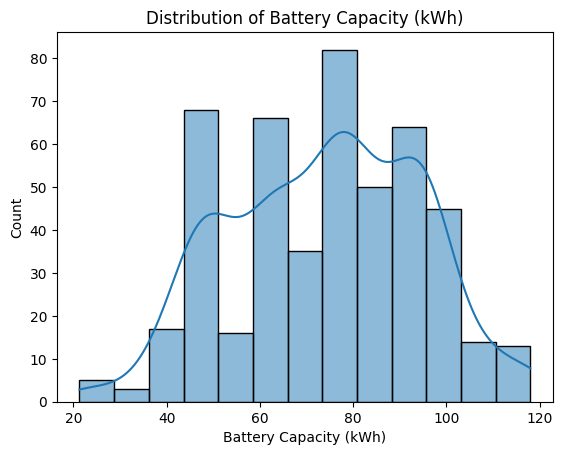

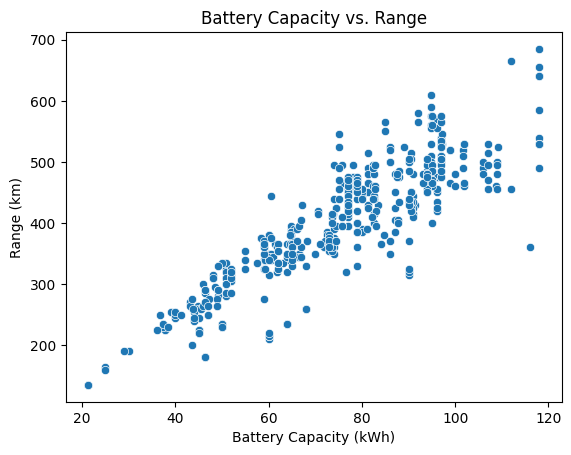

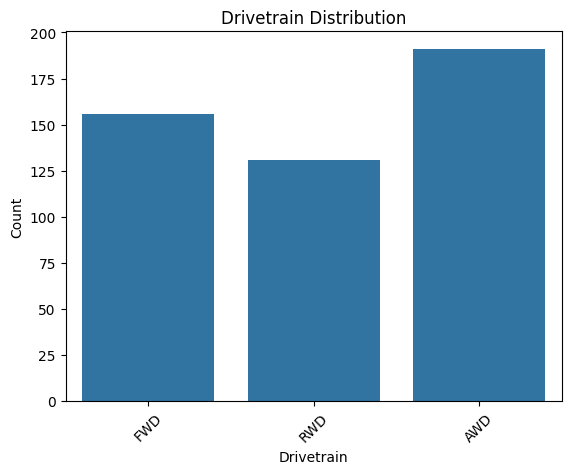

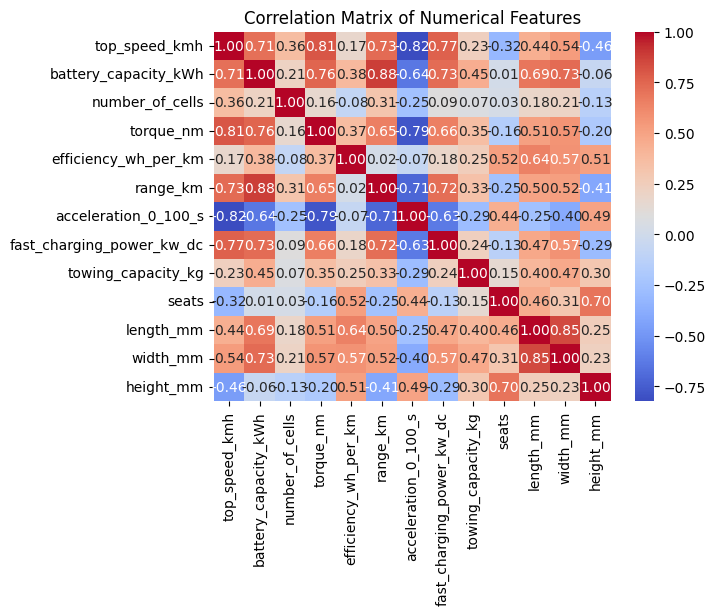

In [4]:

# Distribution of Battery Capacities
sns.histplot(df['battery_capacity_kWh'], kde=True)
plt.title('Distribution of Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Count')
plt.show()

# Range vs. Battery Capacity
sns.scatterplot(data=df, x='battery_capacity_kWh', y='range_km')
plt.title('Battery Capacity vs. Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.show()

# Drivetrain Distribution
sns.countplot(data=df, x='drivetrain')
plt.title('Drivetrain Distribution')
plt.xticks(rotation=45)
plt.xlabel('Drivetrain')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()